# INTRODUCTION 

## Unemployment refers to people who are employable and actively looking for work but are unable to find work. This category also includes people who are employed but do not have a suitable job.
## Unemployment is measured by unemployment rate which is the number of unemployed people as a percentage of the total labor force
## Dataset used for analysis can be downloaded from Kaggle.

In [1]:
# Import import librabries needed for the analaysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (14,7)
plt.style.use('ggplot')


In [2]:
# Load and read the csv dataset file

data = pd.read_csv('C:\\Users\\Dewoyin\\Documents\\excel datasets for python analysis\\unemployment\\output.csv')
unemployment_df = data.copy()


In [3]:
# Read first five rows in the dataset

unemployment_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
# Read last five rows of the dataset

unemployment_df.tail()


,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [5]:
# show the stastical analysis of the numerical columns in the dataset

unemployment_df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [6]:
# check the shape of the dataframe

unemployment_df.shape

(885548, 5)

## The output shows a result of 885548 rows and 5 columns

In [7]:
# Check information aboiut the columns in the dataset

unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [8]:
# Check for missing values in any columns in the dataset

unemployment_df.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [9]:
# Check for unique values of county column

unemployment_df['County'].nunique()

1752

In [10]:
# Check for unique values of State column

unemployment_df['State'].nunique()

47

In [11]:
# Check for County with the highest unemployment rate

highest_unem = unemployment_df.groupby('Rate').max()
highest_unem

,Year,Month,State,County
Rate,,,,
0.0,1993,September,Texas,McMullen County
0.2,1990,August,Nebraska,Dundy County
0.3,1990,October,Nebraska,McPherson County
0.4,1996,September,Nebraska,Sedgwick County
0.5,1999,September,Texas,Terrell County
...,...,...,...,...
53.3,1992,April,Colorado,San Juan County
54.0,1991,February,Texas,Starr County
54.9,1992,March,Colorado,San Juan County


## from the above output, the highest unemployment rate in County was found in San Juan with a rate of 58.4 in Jan 1992. McMullen County has the lowest unemployment rate


In [12]:
# visualization of San Juan data

san = unemployment_df.loc[(unemployment_df['County'] == 'San Juan County') & (unemployment_df['State'] == 'Colorado')]
san


,Year,Month,State,County,Rate
2283,2015,February,Colorado,San Juan County,6.8
5021,2015,October,Colorado,San Juan County,3.0
7823,2015,March,Colorado,San Juan County,7.0
10708,2015,August,Colorado,San Juan County,2.9
13510,2015,May,Colorado,San Juan County,3.7
...,...,...,...,...,...
876212,2009,September,Colorado,San Juan County,5.0
878443,2009,April,Colorado,San Juan County,10.3
880674,2009,December,Colorado,San Juan County,11.8
882905,2009,July,Colorado,San Juan County,4.7


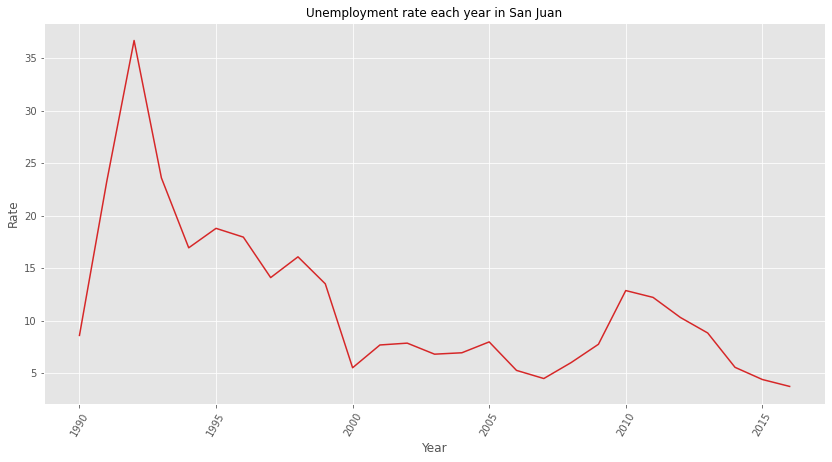

In [13]:
color = sns.color_palette("tab10")

plt.figure(figsize = (14,7))
sns.lineplot(data = san, x = san['Year'], y = san['Rate'], color = color[3], ci = None )
plt.title('Unemployment rate each year in San Juan', fontsize = 12)
plt.xlabel('Year', fontsize = 12 )
plt.ylabel('Rate', fontsize = 12)
plt.xticks(rotation = 60)
plt.show()
                                                                    

## From the graph above, there is an increase in unemployment rate in San Juan between year 1990 and 1995

<AxesSubplot:xlabel='Month', ylabel='Rate'>

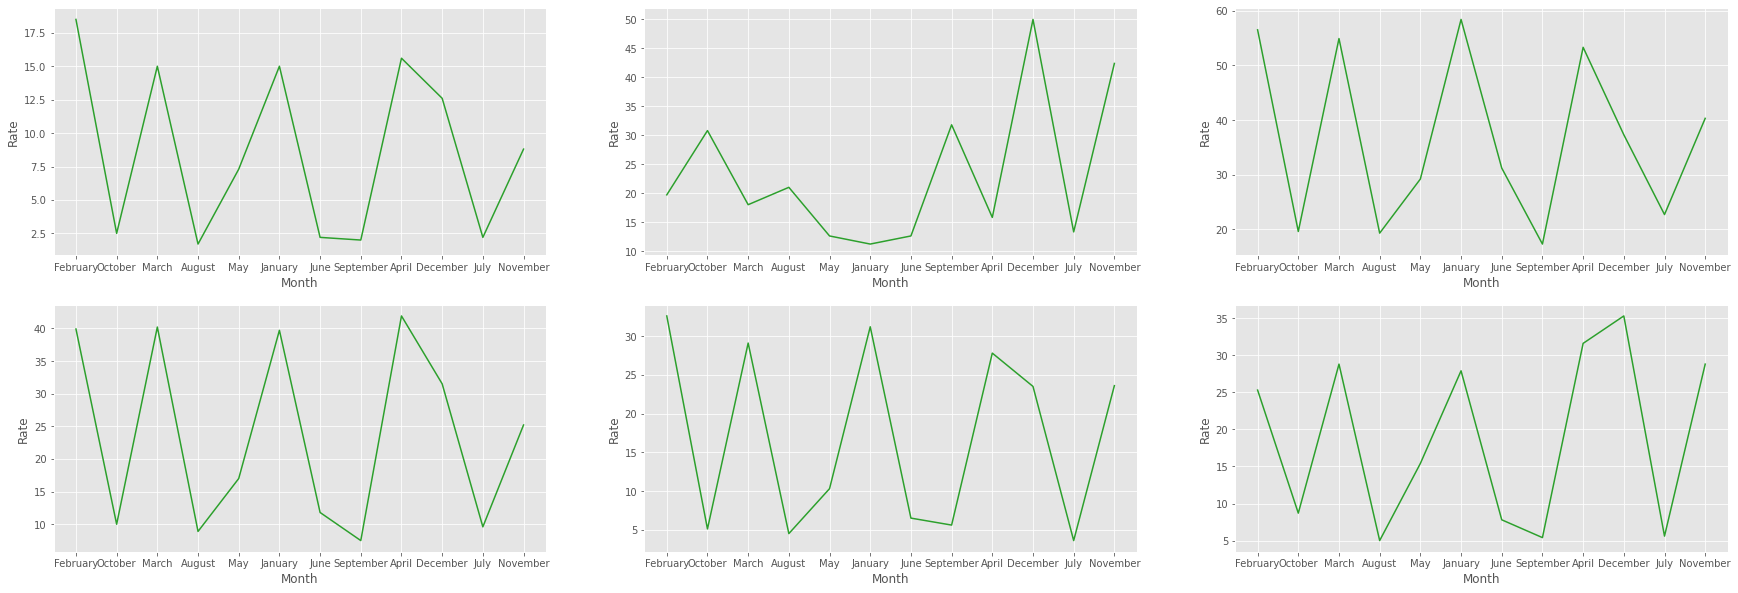

In [14]:
#visualizing the unemployment rate around the years showing the highest surge in rates

fig, axes = plt.subplots(2,3, figsize = (30,10))

first_year = san.loc[san['Year'] == 1990]
sns.lineplot(data = first_year, x = 'Month', y ='Rate', ci= None, color = color[2], ax = axes[0,0] )


second_year = san.loc[san['Year'] == 1991]
sns.lineplot(data = second_year, x = 'Month', y ='Rate', ci= None, color = color[2], ax = axes[0,1] )

third_year = san.loc[san['Year'] == 1992]
sns.lineplot(data = third_year, x = 'Month', y ='Rate', ci= None, color = color[2], ax = axes[0,2] )

fouth_year = san.loc[san['Year'] == 1993]
sns.lineplot(data = fouth_year, x = 'Month', y ='Rate', ci= None, color = color[2], ax = axes[1,0] )

fifth_year = san.loc[san['Year'] == 1994]
sns.lineplot(data = fifth_year, x = 'Month', y ='Rate', ci= None, color = color[2], ax = axes[1,1] )

sixth_year = san.loc[san['Year'] == 1995]
sns.lineplot(data = sixth_year, x = 'Month', y ='Rate', ci= None, color = color[2], ax = axes[1,2] )


## The recession began in 1990 and lasted for eight months until March 1991, resulting in an increase in the unemployment rate during those years.

In [15]:
# Number of times a state appeared in the dataset

state_counts = unemployment_df.State.value_counts()

state_counts.head(10)

Texas             57658
Virginia          39900
Missouri          37260
Kentucky          36360
Kansas            34020
Illinois          33048
North Carolina    32400
Iowa              32076
Tennessee         30780
Nebraska          30132
Name: State, dtype: int64

Text(0, 0.5, 'Counts')

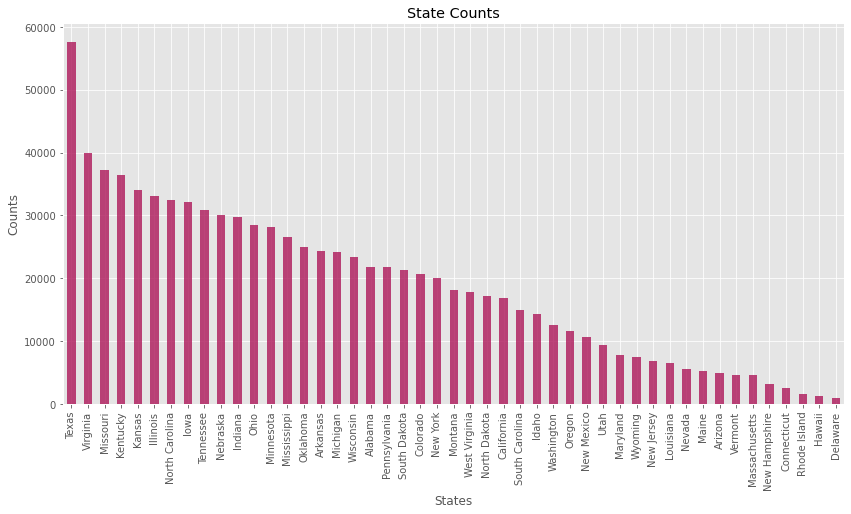

In [16]:
color = sns.color_palette("rocket")
state_counts.plot(kind = 'bar', color = color[2], alpha = 0.8)
plt.title('State Counts')
plt.xlabel('States')
plt.ylabel('Counts')


## Texas appeared the most frequently in our dataset because it is the state with the second largest population and the most counties. Texas is divided into 254 counties.

In [17]:
# Check for State with the highest unemployment rate

State_unem = unemployment_df.groupby('State')['Rate'].max().reset_index().sort_values(['Rate'], ascending = False)
State_unem.head(10)

,State,Rate
4,Colorado,58.4
39,Texas,54.0
30,North Dakota,43.3
1,Arizona,40.5
18,Michigan,40.3
3,California,40.2
27,New Mexico,37.5
20,Mississippi,35.8
38,Tennessee,33.5
13,Kentucky,33.4


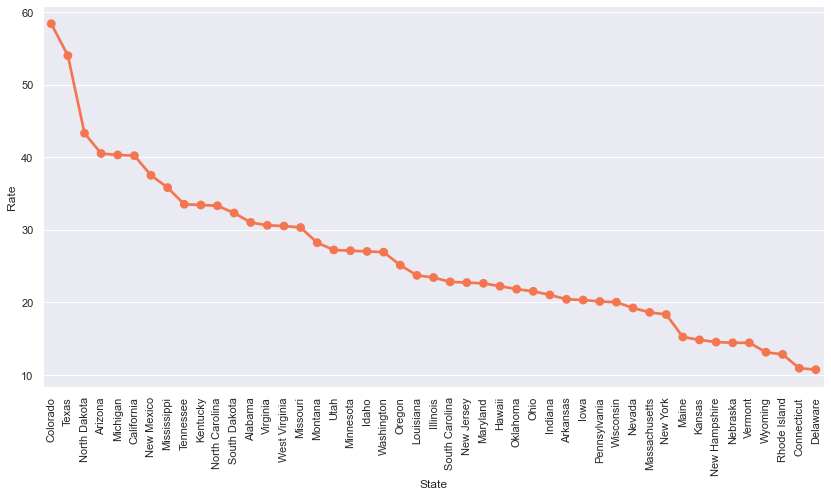

In [18]:
# Visualize state with highest unemployment rate

sns.set_theme(style = 'darkgrid')
sns.pointplot(data = State_unem, x = 'State', y = 'Rate', color = color[4])
plt.xticks(rotation = 90)
plt.show()

## The following factors may contribute to Colorado having the highest unemployment rate.

## San Juan County's Influence; it has the highest umployment rate

## Colorado's location- a diverse landscape of arid desert, river canyons, and half of its area is snow-covered Rocky Mountain. Many businesses may be unwilling to locate here.

In [19]:
# Analysing Colorado in recession years (1990,2001,2007,2008,2009)
col_df = unemployment_df.loc[unemployment_df['State'] == 'Colorado']
col_df



,Year,Month,State,County,Rate
2229,2015,February,Colorado,Gilpin County,4.1
2230,2015,February,Colorado,Las Animas County,6.6
2231,2015,February,Colorado,Morgan County,4.5
2232,2015,February,Colorado,Alamosa County,6.5
2233,2015,February,Colorado,Dolores County,2.9
...,...,...,...,...,...
885288,2009,November,Colorado,Kit Carson County,4.2
885289,2009,November,Colorado,Prowers County,5.5
885290,2009,November,Colorado,Pitkin County,9.0
885291,2009,November,Colorado,Crowley County,9.1


<AxesSubplot:xlabel='Month', ylabel='Rate'>

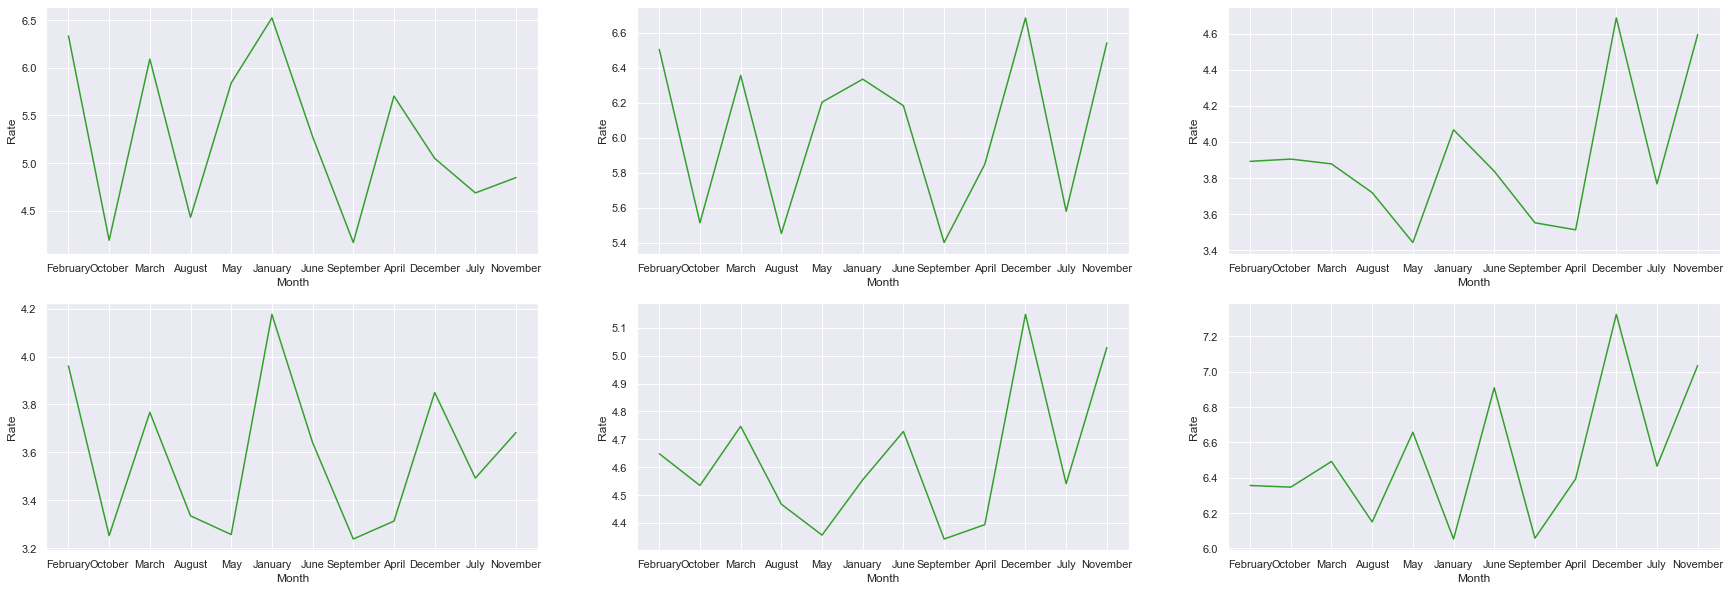

In [20]:
# visualize colorado in the recession years

fig, axes = plt.subplots(2,3, figsize = (30,10))


color = sns.color_palette('Paired')

col_yr1 = col_df.loc[col_df['Year'] == 1990]
sns.lineplot(data = col_yr1, x = 'Month', y ='Rate', ci= None, color = color[3], ax = axes[0,0] )



col_yr2 = col_df.loc[col_df['Year'] == 1991]
sns.lineplot(data = col_yr2, x = 'Month', y ='Rate', ci= None, color = color[3], ax = axes[0,1] )

col_yr3 = col_df.loc[col_df['Year'] == 2001]
sns.lineplot(data = col_yr3, x = 'Month', y ='Rate', ci= None, color = color[3], ax = axes[0,2] )

col_yr4 = col_df.loc[col_df['Year'] == 2007]
sns.lineplot(data = col_yr4, x = 'Month', y ='Rate', ci= None, color = color[3], ax = axes[1,0] )

col_yr5 = col_df.loc[col_df['Year'] == 2008]
sns.lineplot(data = col_yr5, x = 'Month', y ='Rate', ci= None, color = color[3], ax = axes[1,1] )

col_yr6 = col_df.loc[col_df['Year'] == 2009]
sns.lineplot(data = col_yr6, x = 'Month', y ='Rate', ci= None, color = color[3], ax = axes[1,2] )


## From the graph above, it seems effect of recession affect unemployment months after it has started and not immediately. Recesssion started 1990 but unemployment rate didn't started increasing exponentially untill January 1991 and recesssion ended 1991. 
## Second recession in 2001 was from March to November, exponential increase was not seen until after the third quarter of the year.  
## The third recession(the great recession) lasted from December 2007 to June 2009, unemployment rate started increasing significantly in 2008

## Recessions do not affect the unemployment rate immediately, but their effects are felt months later.

In [21]:
# Unemployment rate by Year

year_df = unemployment_df.groupby('Year')['Rate'].max().reset_index()
year_df.head()

,Year,Rate
0,1990,52.6
1,1991,54.0
2,1992,58.4
3,1993,42.6
4,1994,42.2


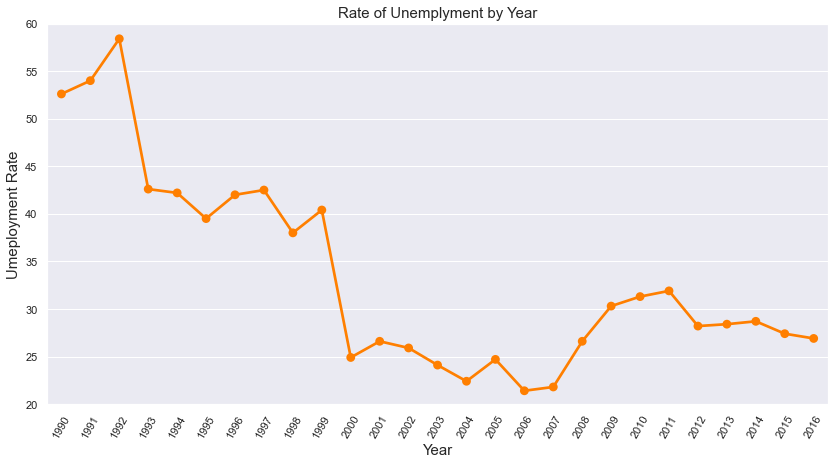

In [22]:
# visualize unemployment rate by Year
plt.figure(figsize = (14,7))
sns.set_theme(style = 'darkgrid')
sns.pointplot(data = year_df, x = 'Year', y = 'Rate', color = color[7])
plt.xticks(rotation = '60')
plt.ylim(20,60)
plt.title('Rate of Unemplyment by Year', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Umeployment Rate', fontsize = 15)
plt.show()

In [23]:
# Unemployment rate by Month

month_df = unemployment_df.groupby('Month')['Rate'].max().reset_index()
month_df.head()


,Month,Rate
0,April,53.3
1,August,40.5
2,December,50.0
3,February,56.5
4,January,58.4


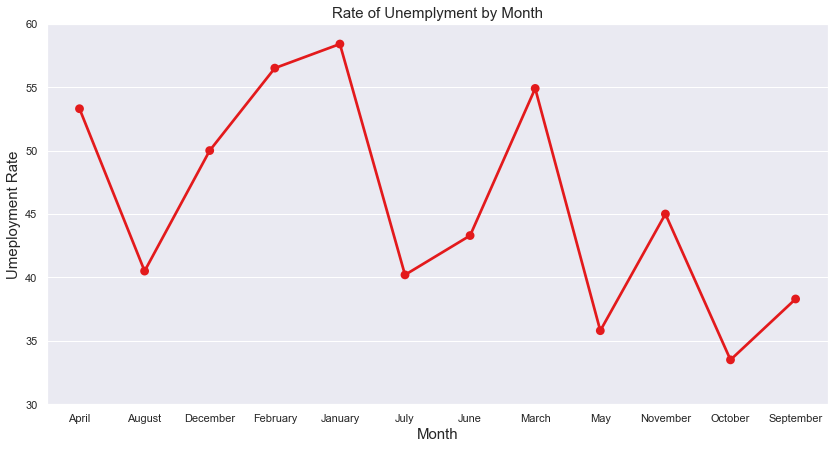

In [24]:
# visualize unemployment rate by Year
plt.figure(figsize = (14,7))
sns.set_theme(style = 'darkgrid')
sns.pointplot(data = month_df, x = 'Month', y = 'Rate', color = color[5])
plt.xticks(rotation = 'horizontal')
plt.ylim(30,60)
plt.title('Rate of Unemplyment by Month', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Umeployment Rate', fontsize = 15)
plt.show()

# CONCLUSION 
##  Colorado State has the highest unemployment rate, followed by Texas State.
##  San Juan County has the highest unemployment rate, while McMullen County has the lowest.
##  The unemployment rate was highest in 1992 and 1991, most likely due to the recession that occurred during those years.
##  Recessions do not immediately affect the unemployment rate, but their effects are felt months later.
##  Unemployment is particularly high in December, January, and February.
